In [1]:
import cv2
print(cv2.__version__)
import numpy as np

4.1.1


In [2]:
img = cv2.imread('clastered_image.jpg')

# Wyszukiwanie w oparciu o średnią

### Wiersze z średnią wartością rgb (im wyższa wartość tym więcej czarnego w wierszu)

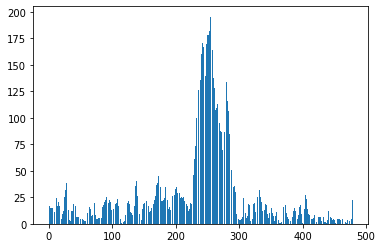

In [105]:
hist = [255 - np.mean(row) for row in img]
rows = np.arange(len(hist))
plt.bar(rows, hist)
plt.show()

### Wybieramy wyłącznie wiersze z 80 percentyla (założenie że wiersze z paletą mają znacznie więcej czarnego niż te bez palety) i traktujemy je jako ważne (czarne) wiersze

In [106]:
perc = np.percentile(hist, 80)

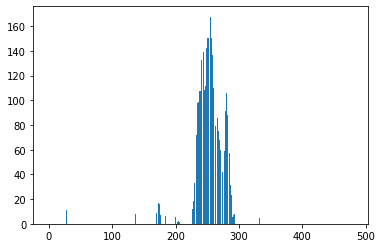

In [107]:
hist_perc = [max(x - perc, 0) for x in hist]
rows = np.arange(len(hist_perc))
plt.bar(rows, hist_perc)
plt.show()

### Wybieramy tylko te wiersze które mają w swoim sądziedzwie liczbę czarnych wierszy powyżej pewnego progu
#### parametr frame - wielkość sądziedzwa
#### parametr threshold - próg liczby sąsiadów

In [108]:
frame = 10
threshold = 5

def check_frame(row_id, image):
    return np.count_nonzero(image[row_id: row_id + frame]) > threshold

detection = [ row_id for row_id, value in enumerate(hist_perc) if check_frame(row_id, hist_perc) ]

### Wykrywanie grup (granic) czarnych wierszy.
#### parametr border_size - okresla max odległość pomiędzy czarnymi wierszami aby zaklasyfikować ich do jednej grupy

In [110]:
border_size = 10
def check_row(list_id, rows):
    if list_id == len(rows) -1 :
        return rows[list_id] - rows[list_id - 1] < border_size
    if list_id == 0:
        return rows[list_id + 1] - rows[list_id] < border_size
    return rows[list_id] - rows[list_id - 1] > border_size or rows[list_id + 1] - rows[list_id] > border_size
        
borders = [x for x_id, x in enumerate(detection) if check_row(x_id, detection)]

In [113]:
for line_y in borders:
    cv2.line(img,(0,line_y), (640,line_y), (0,0,255),2) 
    cv2.imwrite('lines_detected.jpg', img)

# Czas operacji

In [116]:
import time

img = cv2.imread('clastered_image.jpg')

# parameters
percentile = 80 # percentil, with rows we accept as pallets (with more black pixel than in other rows)
frame = 10 # we decice that row is important if it neighbours in frame are also in percentil
threshold = 5 # threshold of neihtbours in frame in detecting important rows
border_size = 10 # we detecting groups of important rows (mayby pallet), 
                        #this parameter is maximal space between rows


start = time.time()

hist = [255 - np.mean(row) for row in img]
perc = np.percentile(hist, percentile)
hist_perc = [max(x - perc, 0) for x in hist]

def check_frame(row_id, image):
    return np.count_nonzero(image[row_id: row_id + frame]) > threshold

detection = [ row_id for row_id, value in enumerate(hist_perc) if check_frame(row_id, hist_perc) ]

def check_row(list_id, rows):
    if list_id == len(rows) -1 :
        return rows[list_id] - rows[list_id - 1] < border_size
    if list_id == 0:
        return rows[list_id + 1] - rows[list_id] < border_size
    return rows[list_id] - rows[list_id - 1] > border_size or rows[list_id + 1] - rows[list_id] > border_size
        
borders = [x for x_id, x in enumerate(detection) if check_row(x_id, detection)]

end = time.time()

print('Image line detection time: ', round(end - start,2), 's')

for line_y in borders:
    cv2.line(img,(0,line_y), (640,line_y), (0,0,255),2) 
    cv2.imwrite('lines_detected.jpg', img)


Image line detection time:  0.01 s
